In [1]:
import numpy as np, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [18]:
def plot_spec(qobj,w,rlz=None,cn=1,lmin=40,lmax=2048,bnum=10,output=True):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    Skk, __ = local.load_spec(qobj,mb,rlz=rlz,cn=cn)
    Skk /= w[4]
    # factor
    if cn == 2:
        rl = np.ones(len(l))
    else:
        l, xl = (np.loadtxt(qobj.f['TT'].mcls,usecols=(0,3))).T
        rl = ( l*(l+1)*xl/2./w[2] ) / aobj.ckk[:lmax+1]
    Mkk = np.mean(Skk,axis=0)
    Vkk = np.std(Skk,axis=0)
    print(np.sqrt(np.sum(Mkk**2/Vkk**2)))
    st = ana.amplitude(Mkk,Skk,fcb=None,diag=False,disp=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ylab='$C_L^{\kappa\kappa}$')
    errorbar(mb.bc+5,Mkk,yerr=Vkk,fmt='o')
    plot(aobj.l,aobj.ckk,color='k',ls='--')
    axhline(0,color='k')
    show()
    if output: return Mkk, Vkk

In [3]:
def plot_bias(qobj,w,cn=1):
    pl.plot_1dstyle(fsize=[10,4],xmin=2,xmax=2048,ymin=1e-9,ymax=1e-4,ylog=True,ylab='$C_L^{\kappa\kappa}$')
    l, al = (np.loadtxt(qobj.f['TT'].al,usecols=(0,cn))).T
    l, n0 = (np.loadtxt(qobj.f['TT'].n0bs,usecols=(0,cn))).T
    l, ml = (np.loadtxt(qobj.f['TT'].ml[1],usecols=(0,cn))).T
    l, cl = (np.loadtxt(qobj.f['TT'].mcls,usecols=(0,cn))).T
    plot(l,al,label='norm')
    plot(l,n0/w[4],label='N0')
    plot(l,ml/w[4],label='MF')
    plot(l,cl/w[4]/99.,label='MF-MC')
    legend()

In [4]:
dirs = local.data_directory()
qobj = {}
Qobj = {}
aobj = local.init_analysis_params(qid='comb_dn',ascale=3.,wtype='com16v3')
qobj['com16v3'] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'],bhe=['src'])
Qobj['com16v3'] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])

In [5]:
w16 = tools_cmb.get_wfactors(['comb_dn'],3.,wtype='com16v3',wnmax=9)

wfactors: [1.99035681e-02 1.17988937e-06 8.74268232e-11 6.89972364e-15
 5.64587096e-19 4.73581082e-23 4.04602050e-27 3.50648020e-31
 3.07435980e-35]


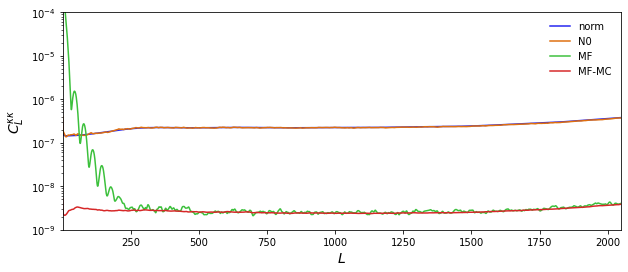

In [6]:
plot_bias(qobj['com16v3'],w16['comb_dn'],cn=1)

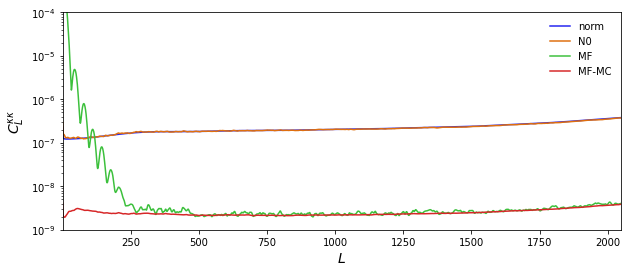

In [7]:
plot_bias(Qobj['com16v3'],w16['comb_dn'],cn=1)

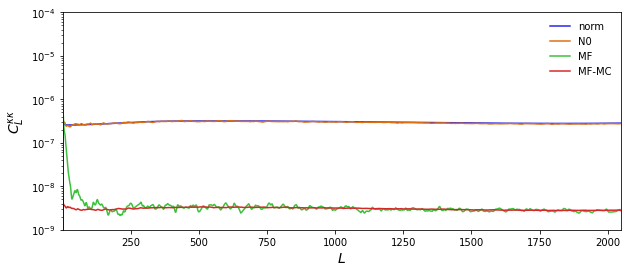

In [8]:
plot_bias(Qobj['com16v3'],w16['comb_dn'],cn=2)

In [9]:
l, xl = (np.loadtxt(qobj['com16v3'].f['TT'].mcls,usecols=(0,3))).T

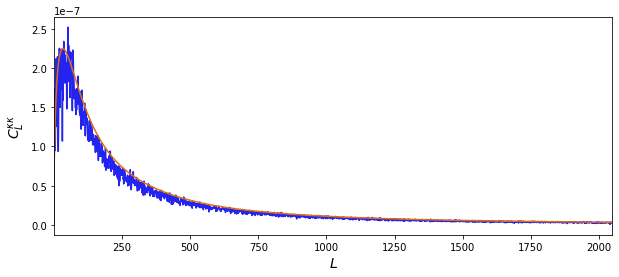

In [10]:
pl.plot_1dstyle(fsize=[10,4],xmin=2,xmax=2048,ylab='$C_L^{\kappa\kappa}$')
plot(l,l*(l+1)*xl/w16['comb_dn'][2]/2)
plot(aobj.l,aobj.ckk)

10.433797656309396
obs A 1.0 mean(A) 1.001 sigma(A) 0.129 S/N 7.78 A>oA 0.94


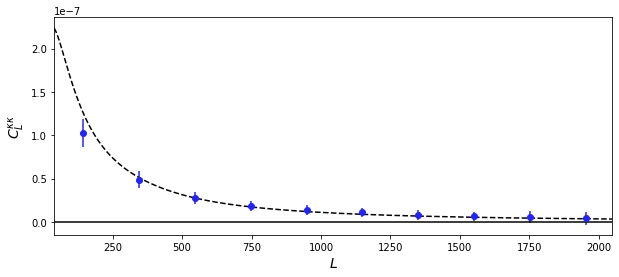

In [11]:
mkk, vkk = plot_spec(Qobj['com16v3'],w16['comb_dn'],cn=1,bnum=10)

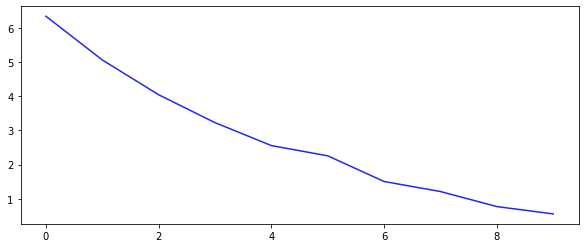

In [12]:
plot(mkk/vkk)

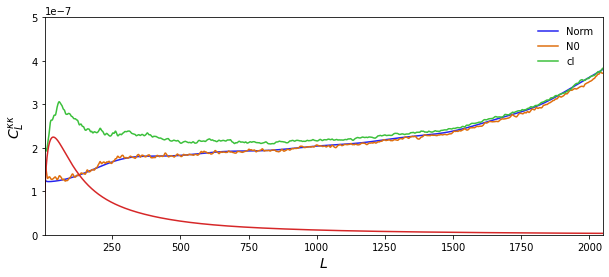

In [13]:
pl.plot_1dstyle(fsize=[10,4],xmin=2,xmax=2048,ymin=0,ymax=5e-7,ylab='$C_L^{\kappa\kappa}$')
l, al = (np.loadtxt(Qobj['com16v3'].f['TT'].al,usecols=(0,1))).T
l, n0 = (np.loadtxt(Qobj['com16v3'].f['TT'].n0bs,usecols=(0,1))).T
l, cl, vl = (np.loadtxt(Qobj['com16v3'].f['TT'].mcls,usecols=(0,1,5))).T
plot(l,al,label='Norm')
plot(l,n0/w16['comb_dn'][4],label='N0')
plot(l,cl/w16['comb_dn'][4],label='cl')
plot(aobj.l,aobj.ckk)
legend()

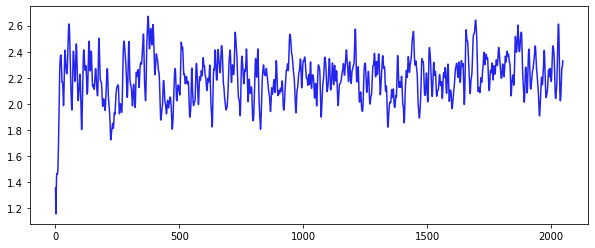

In [25]:
plot(l,vl/cl*np.sqrt(l+0.5))

In [23]:
print(np.sqrt(w16['comb_dn'][8]*w16['comb_dn'][0])/w16['comb_dn'][4])

1.3855170294892276


9.565567966544883
obs A 1.0 mean(A) 1.001 sigma(A) 0.145 S/N 6.911 A>oA 1.0


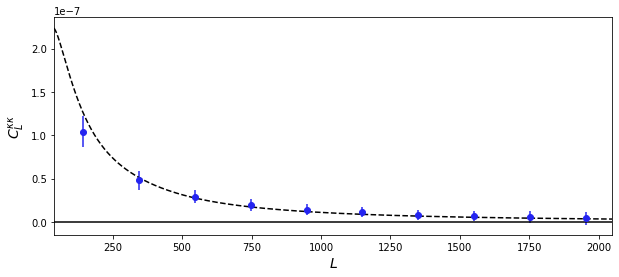

(array([1.03870875e-07, 4.82592843e-08, 2.92753798e-08, 1.96058743e-08,
        1.43698342e-08, 1.13285233e-08, 8.25532181e-09, 6.72181855e-09,
        5.31759589e-09, 4.31682761e-09]),
 array([1.78537951e-08, 1.08630491e-08, 7.78630690e-09, 6.49423048e-09,
        5.99890156e-09, 5.41435973e-09, 5.74243507e-09, 5.38895381e-09,
        6.77683822e-09, 7.72878166e-09]))

In [16]:
plot_spec(qobj['com16v3'],w16['comb_dn'],cn=1,bnum=10,output=False)

10.433797656309396
obs A 1.0 mean(A) 1.001 sigma(A) 0.129 S/N 7.78 A>oA 0.94


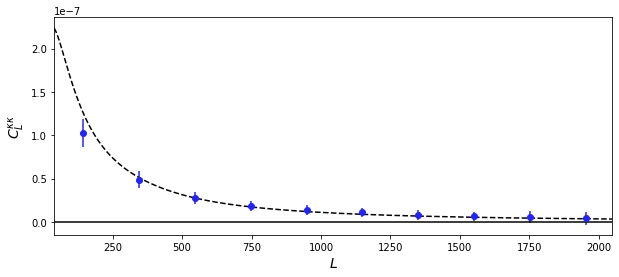

(array([1.02803891e-07, 4.85998598e-08, 2.78237857e-08, 1.85497122e-08,
        1.40186403e-08, 1.11953543e-08, 8.22109949e-09, 6.36293865e-09,
        5.25340829e-09, 4.28833121e-09]),
 array([1.62078640e-08, 9.59918769e-09, 6.88067856e-09, 5.74903478e-09,
        5.48627044e-09, 4.96406037e-09, 5.46906977e-09, 5.26092027e-09,
        6.83057882e-09, 7.73658941e-09]))

In [17]:
plot_spec(Qobj['com16v3'],w16['comb_dn'],cn=1,bnum=10,output=False)